In [11]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

The features are:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


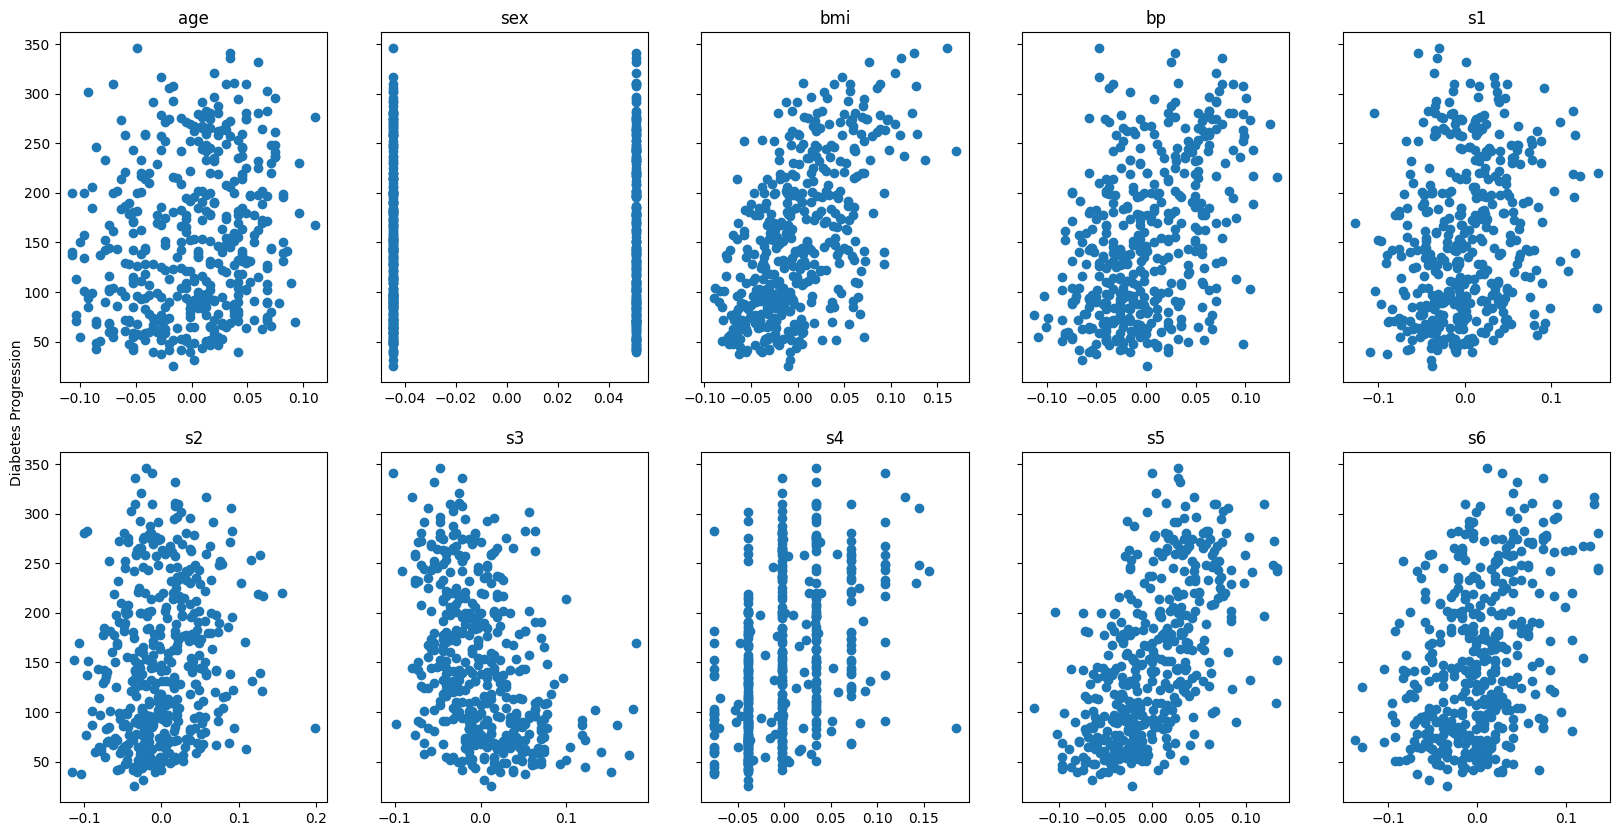

In [12]:
# Load the diabetes dataset
data = load_diabetes(as_frame=True)

print("The features are: ", data.feature_names)

# Load the data into a DataFrame
df_d = data.frame

# Create subplots for visualizing each feature vs target
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharey=True)  
cols = df_d.columns[:-1] 

# Plot each feature against the target
for i, ax in enumerate(axes.flatten()):  
    ax.scatter(x=df_d[cols[i]], y=df_d['target'])
    ax.set_title(cols[i])  

# Add a label to the figure
fig.text(0.1, 0.5, 'Diabetes Progression', va='center', rotation='vertical')

# Display the plot
plt.show()

In [13]:
# Features (X) and target (y)
X = df_d.iloc[:, :-1].values
y = df_d.iloc[:, -1]

# Display X and y
print("Features (X):\n", X)
print("Target (y):\n", y)

Features (X):
 [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
Target (y):
 0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


In [14]:
# Split the data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=1)

# Print the shape of the training and test data
print("\nTrain data size: ", X_train1.shape, y_train1.shape)
print("Test data size: ", X_test1.shape, y_test1.shape)


Train data size:  (353, 10) (353,)
Test data size:  (89, 10) (89,)


In [15]:
# Train a Linear Regression model
lr_rmodel = LinearRegression().fit(X_train1, y_train1)

print("Linear Regression Model Coefficients: ", lr_rmodel.coef_)
print("Linear Regression Model Intercept: ", lr_rmodel.intercept_)

Linear Regression Model Coefficients:  [ -30.62219046 -272.2506057   528.85252681  327.69716891 -581.01973841
  332.97061365  -27.97314298  139.28036115  665.07667773   61.90517166]
Linear Regression Model Intercept:  151.4300932966009


In [16]:
# Calculate mean squared error
mse_lr = mean_squared_error(y_test1, lr_rmodel.predict(X_test1))
print("\nLinear Regression Mean Squared Error is: ", mse_lr)


Linear Regression Mean Squared Error is:  2992.5812293010163


In [17]:
# Select a specific feature (e.g., BMI)
bmi = df_d.iloc[:, 4]
print(X)
print(y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


In [18]:
# Train a simple linear regression model using a single feature (e.g., BMI)
feature = df_d.columns[2]  # Choosing a specific feature like 'bmi'
X_simple = df_d[[feature]].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_simple, y, test_size=0.2, random_state=1)

# Correct the usage of the LinearRegression() class
lr_simple_model = LinearRegression().fit(X_train2, y_train2)

# Calculate the mean squared error for simple linear regression
mse_simple = mean_squared_error(y_test2, lr_simple_model.predict(X_test2))
print(f"Simple Linear Regression Mean Squared Error ({feature}): ", mse_simple)

Simple Linear Regression Mean Squared Error (bmi):  3989.8289727609313


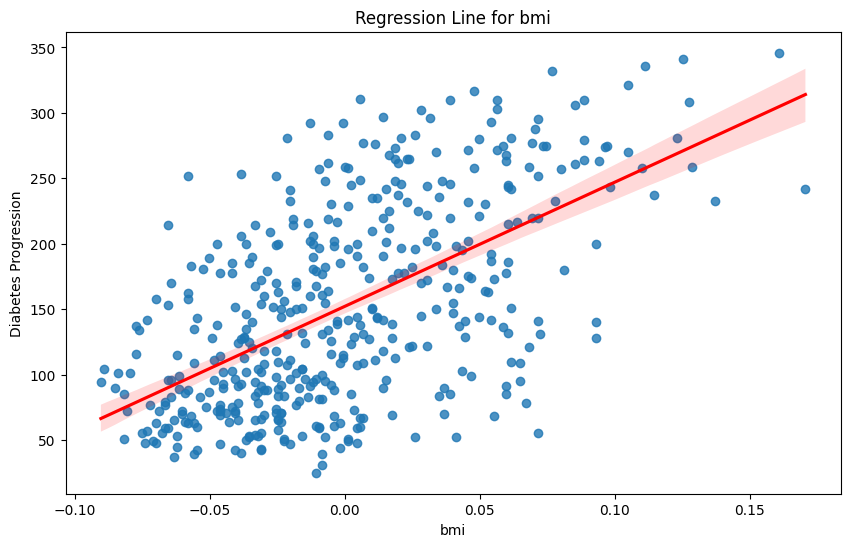

In [19]:
# Plot regression line for the chosen feature
plt.figure(figsize=(10, 6))
sns.regplot(x=df_d[feature], y=df_d['target'], line_kws={"color": "red"})
plt.title(f"Regression Line for {feature}")
plt.ylabel("Diabetes Progression")
plt.xlabel(feature)
plt.show()